In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import struct
import tensorflow as tf
from tensorflow.keras import layers
import PIL
import PIL.Image
import pathlib
import shutil
from tensorflow.keras.models import Sequential

In [4]:
print(tf.__version__)
print(tf.keras.__version__)

2.3.0
2.4.0


In [5]:
train_labels=pd.read_csv("./final-project-food-recognition-challenge/train_labels.csv")
sample=pd.read_csv("./final-project-food-recognition-challenge/sample.csv")

In [6]:
train_labels.head()

,img_name,label
0,train_1.jpg,21
1,train_2.jpg,29
2,train_3.jpg,17
3,train_4.jpg,21
4,train_5.jpg,50


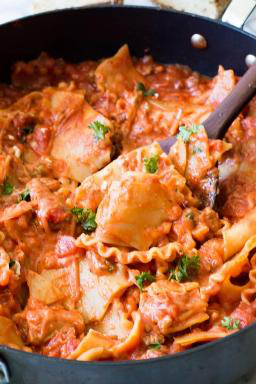

In [7]:
PIL.Image.open("./final-project-food-recognition-challenge/train_set/1/train_74.jpg")

In [32]:
#for folder in train_labels["label"].unique():
#    os.mkdir("./final-project-food-recognition-challenge/train_set/"+str(folder))

In [35]:
#for index, row in train_labels.iterrows():
#    shutil.move("./final-project-food-recognition-challenge/train_set/train_set/"+row["img_name"],
#                "./final-project-food-recognition-challenge/train_set/"+str(row["label"])+"/")

In [8]:
train_data_dir="./final-project-food-recognition-challenge/train_set/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.95,
  subset="training",
  seed=123, 
  image_size=(256, 384))

Found 30612 files belonging to 80 classes.
Using 1531 files for training.


In [10]:
train_data_dir="./final-project-food-recognition-challenge/train_set/"
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.01,
  subset="validation",
  seed=123, 
  image_size=(256, 384))

Found 30612 files belonging to 80 classes.
Using 306 files for validation.


In [11]:
len(train_ds.class_names)

80

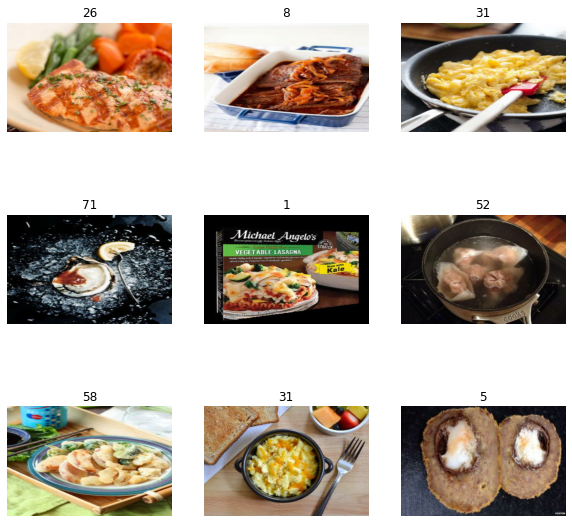

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [45]:
#normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
#normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_ds))
#first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
#print(np.min(first_image), np.max(first_image))

In [14]:
num_classes = 80
img_height=256
img_width=384

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 384, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 384, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 192, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 192, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 96, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 48, 64)        0

In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
48/48 [==============================] - 76s 2s/step - loss: 4.4535 - accuracy: 0.0105 - val_loss: 4.3810 - val_accuracy: 0.0065
Epoch 2/10
48/48 [==============================] - 75s 2s/step - loss: 4.3648 - accuracy: 0.0274 - val_loss: 4.3779 - val_accuracy: 0.0065
Epoch 3/10
48/48 [==============================] - 76s 2s/step - loss: 4.1284 - accuracy: 0.0686 - val_loss: 4.3906 - val_accuracy: 0.0131
Epoch 4/10
48/48 [==============================] - 77s 2s/step - loss: 2.6579 - accuracy: 0.4154 - val_loss: 5.3569 - val_accuracy: 0.0359
Epoch 5/10
48/48 [==============================] - 77s 2s/step - loss: 0.8658 - accuracy: 0.8171 - val_loss: 7.7753 - val_accuracy: 0.0392
Epoch 6/10
48/48 [==============================] - 78s 2s/step - loss: 0.2830 - accuracy: 0.9471 - val_loss: 10.3995 - val_accuracy: 0.0327
Epoch 7/10
48/48 [==============================] - 77s 2s/step - loss: 0.1301 - accuracy: 0.9758 - val_loss: 10.6872 - val_accuracy: 0.0425
Epoch 8/10
48/48 [

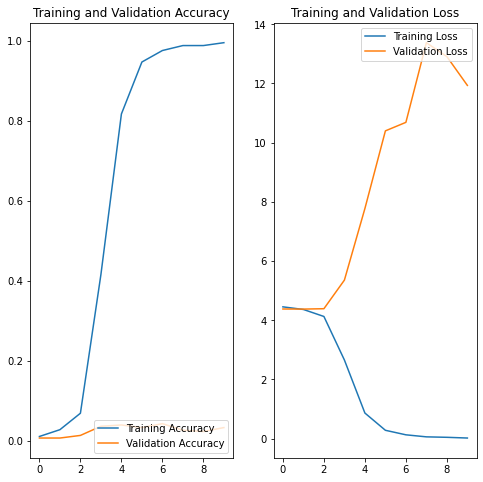

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()